#**AdaBoost**

# Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from google.colab import files

# Load and Prepare the Dataset

In [7]:
uploaded = files.upload()
file_path = '/content/ev_data_normalized.csv'
normalized_df = pd.read_csv(file_path)

Saving ev_data_normalized.csv to ev_data_normalized.csv


In [9]:
target_column = 'Electric Vehicle Type'
X = normalized_df.drop(columns=[target_column])  # Features
y = normalized_df[target_column]

# Split Data into Training and Testing Sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the AdaBoost Model

In [12]:
estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(estimator=estimator, n_estimators=100, learning_rate=1.0, random_state=42)

adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

# Make Predictions and Calculate Metrics

In [14]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import numpy as np

# Make predictions on the test set
y_pred = adaboost.predict(X_test)

# Classification Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"CA (Classification Accuracy): {accuracy:.8f}")

# F1 Score for each class
f1 = f1_score(y_test, y_pred, average=None)
print(f"\nF1 Scores per Class: {f1}")

# Precision and Recall for each class
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
print(f"\nPrecision for each class: {precision}")
print(f"Recall for each class: {recall}")
print(f"F1 Score for each class: {f1}")

# Recall for each class
print("\nRC (Recall) for each class:")
for i, class_name in enumerate(np.unique(y)):
    print(f"{class_name}: {recall[i]:.8f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=8))



CA (Classification Accuracy): 0.99990918

F1 Scores per Class: [0.99994256 0.9997832 ]

Precision for each class: [0.99991385 0.99989159]
Recall for each class: [0.99997128 0.99967483]
F1 Score for each class: [0.99994256 0.9997832 ]

RC (Recall) for each class:
0.0: 0.99997128
1.0: 0.99967483

Classification Report:
              precision    recall  f1-score   support

         0.0  0.99991385 0.99997128 0.99994256     34819
         1.0  0.99989159 0.99967483 0.99978320      9226

    accuracy                      0.99990918     44045
   macro avg  0.99990272 0.99982306 0.99986288     44045
weighted avg  0.99990918 0.99990918 0.99990918     44045



# Confusion Matrix Visualization


Confusion Matrix:
[[34818     1]
 [    3  9223]]


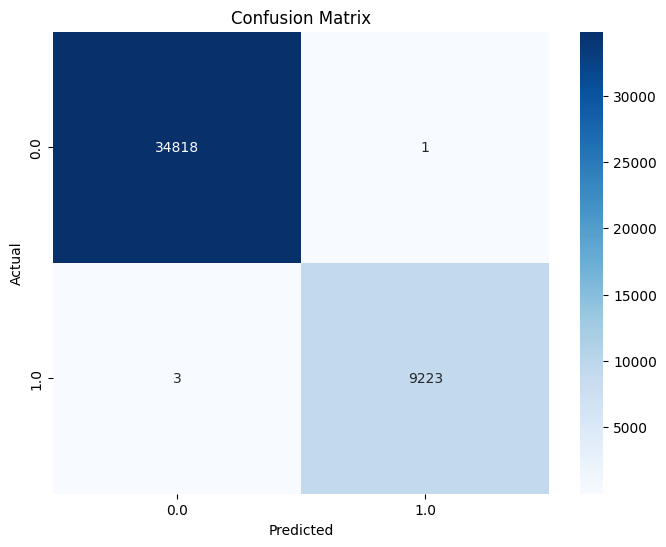

In [15]:
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Feature Importance Vizualization

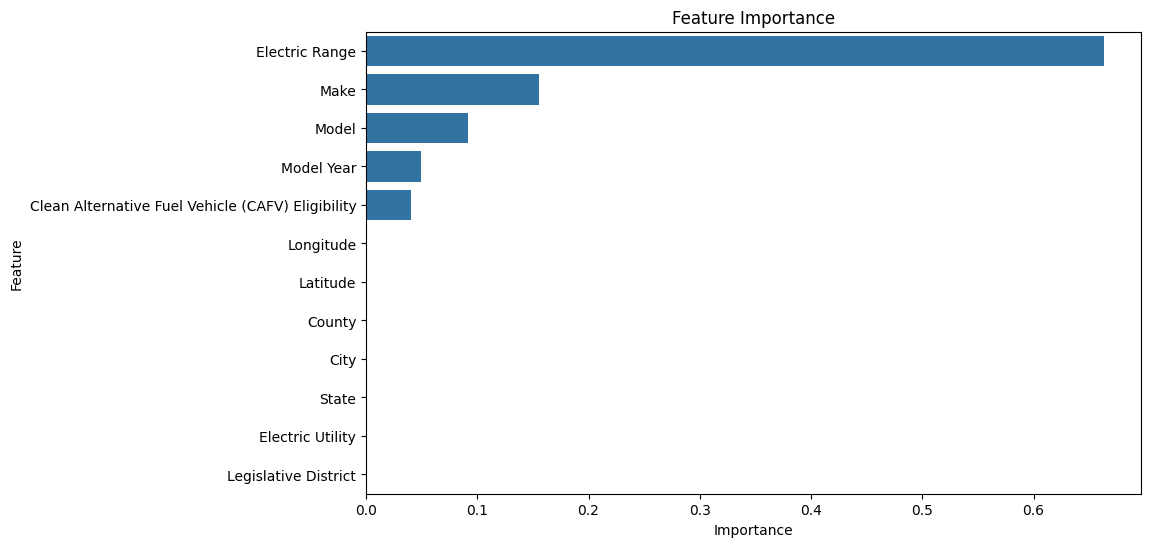

In [16]:
try:
    feature_importances = adaboost.feature_importances_
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title("Feature Importance")
    plt.show()
except AttributeError:
    print("\nFeature importance is not applicable for this model setup.")

# Results

In [18]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Define parameter combinations for AdaBoost
param_combinations = [
    {'n_estimators': 50, 'learning_rate': 0.5},
    {'n_estimators': 50, 'learning_rate': 1.0},
    {'n_estimators': 100, 'learning_rate': 0.5},
    {'n_estimators': 100, 'learning_rate': 1.0},
    {'n_estimators': 150, 'learning_rate': 0.8},
    {'n_estimators': 150, 'learning_rate': 1.2},
    {'n_estimators': 200, 'learning_rate': 0.6},
    {'n_estimators': 200, 'learning_rate': 1.0},
    {'n_estimators': 250, 'learning_rate': 0.4},
    {'n_estimators': 250, 'learning_rate': 1.5},
    {'n_estimators': 300, 'learning_rate': 0.7},
    {'n_estimators': 300, 'learning_rate': 1.0}
]

# Initialize base estimator (weak learner)
estimator = DecisionTreeClassifier(max_depth=1)

# Perform training and evaluation for each parameter combination
for i, params in enumerate(param_combinations, 1):
    print(f"\nTraining model {i}/{len(param_combinations)} with parameters: {params}")

    # Train AdaBoost model
    adaboost = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=params['n_estimators'],
        learning_rate=params['learning_rate'],
        random_state=42
    )
    adaboost.fit(X_train, y_train)

    # Make predictions
    y_pred = adaboost.predict(X_test)

    # Print the classification report
    print(f"\nClassification Report for Model {i}:")
    print(classification_report(y_test, y_pred, digits=8))



Training model 1/12 with parameters: {'n_estimators': 50, 'learning_rate': 0.5}

Classification Report for Model 1:
              precision    recall  f1-score   support

         0.0  0.99602266 0.99971280 0.99786432     34819
         1.0  0.99890074 0.98493388 0.99186814      9226

    accuracy                      0.99661710     44045
   macro avg  0.99746170 0.99232334 0.99486623     44045
weighted avg  0.99662553 0.99661710 0.99660832     44045


Training model 2/12 with parameters: {'n_estimators': 50, 'learning_rate': 1.0}

Classification Report for Model 2:
              precision    recall  f1-score   support

         0.0  0.99979874 0.99870760 0.99925287     34819
         1.0  0.99514249 0.99924127 0.99718767      9226

    accuracy                      0.99881939     44045
   macro avg  0.99747061 0.99897444 0.99822027     44045
weighted avg  0.99882341 0.99881939 0.99882028     44045


Training model 3/12 with parameters: {'n_estimators': 100, 'learning_rate': 0.5}

Cla